In [92]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
#sns.set(style='darkgrid')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/cat-in-the-dat/train.csv
/kaggle/input/cat-in-the-dat/sample_submission.csv
/kaggle/input/cat-in-the-dat/test.csv


In [93]:
train_data = pd.read_csv("/kaggle/input/cat-in-the-dat/train.csv")
test_data = pd.read_csv("/kaggle/input/cat-in-the-dat/test.csv")
train_data.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [94]:
train_data.shape

(300000, 25)

In [95]:
#To CHeck 
train_data.isnull().sum().sum()

0

In [96]:
All_features=train_data.columns.tolist()
Numerical_features=['bin_0','bin_1','bin_2','ord_0','day','month','target']
categorical_features=list(set(All_features) - set(Numerical_features))
Numerical_features.remove('target')
print(categorical_features)
print(Numerical_features)

['nom_4', 'bin_4', 'ord_3', 'nom_5', 'bin_3', 'ord_5', 'nom_3', 'ord_1', 'id', 'nom_0', 'nom_7', 'nom_2', 'nom_9', 'nom_8', 'ord_2', 'ord_4', 'nom_6', 'nom_1']
['bin_0', 'bin_1', 'bin_2', 'ord_0', 'day', 'month']


<hr>
<h3>Working on Numerical Data</h3>

In [97]:
#Id column is not necessary 
train_data=train_data.drop(['id'], axis = 1) 

In [98]:
# to get description of numerical data in dataset
train_data.describe()

,bin_0,bin_1,bin_2,ord_0,day,month,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.00000
mean,0.127503,0.256607,0.383223,1.479567,3.007817,5.771113,0.30588
std,0.333537,0.436761,0.486173,0.712524,1.817949,3.843519,0.46078
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.00000
25%,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,0.00000
50%,0.000000,0.000000,0.000000,1.000000,3.000000,4.000000,0.00000
75%,0.000000,1.000000,1.000000,2.000000,4.000000,9.000000,1.00000
max,1.000000,1.000000,1.000000,3.000000,7.000000,12.000000,1.00000


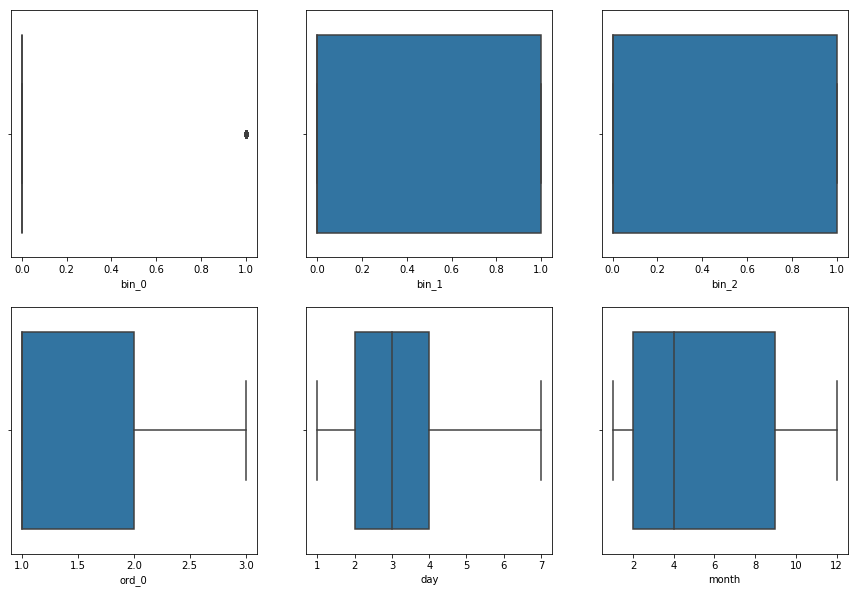

In [101]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for variable, subplot in zip(Numerical_features, ax.flatten()):
    sns.boxplot(train_data[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

No Need of outlier Treatment

<hr>
<h3>Working on Categorical Data</h3>

In [ ]:
binary = {'T': 1,'F': 0}
train_data["bin_3"]= [binary[item] for item in train_data["bin_3"]]
binary = {'Y': 1,'N': 0}
train_data["bin_4"]= [binary[item] for item in train_data["bin_4"]]
train_data.head()

In [ ]:
for cname in categorical_features:
    print(cname+" : "+str(len(train_data[cname].unique())))

*number of unique values in ord_4, ord_5 nom_5, nom_8, nom_7, nom_6, Nom-9 are too high so one hot encoding for these features won't result in proper results*